The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/rahuldogra/top5000youtubechannels): `top-5000-youtube-channels.csv`

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('top-5000-youtube-channels.csv')

## Reviewing dataset

In [5]:
df.shape

(5000, 6)

In [6]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [8]:
df.head(3)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082


In [9]:
# Display all rows except the last 5 rows
df.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


In [10]:
# Display all rows except the first 5 rows
df.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [11]:
# Get overall statistics about the dataframe
df.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5.000000e+03
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.071449e+09
std,NaN,NaN,NaN,NaN,NaN,2.003844e+09
min,NaN,NaN,NaN,NaN,NaN,7.500000e+01
25%,NaN,NaN,NaN,NaN,NaN,1.862329e+08
50%,NaN,NaN,NaN,NaN,NaN,4.820548e+08
75%,NaN,NaN,NaN,NaN,NaN,1.124368e+09


In [12]:
# video views are described in exponential format. 
# lets convert it into decimal format

pd.options.display.float_format = '{:.2f}'.format

In [13]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [14]:
df.isna().any()

Rank             False
Grade            False
Channel name     False
Video Uploads    False
Subscribers      False
Video views      False
dtype: bool

In [15]:
df.isna().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

## Cleaning database

In [17]:
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [18]:
# Replace '--'  to NaN
df.replace('--',np.nan,regex=True)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [19]:
# at the end we have to give this data to machine learning algorithms.
# most of the ML algorithms can only understand numerical values. Either int or float.
# so at the end we have to convert all the column to either int or float.

In [21]:
#1: Cleaning data [Rank Column]
# to clean this rank column, we are going to perform 3 steps:
# 1 - we will remove the string in "Rank column"
# 2 - we will remove this commas
# 3 - we will convert the data types of rank columns to int

In [22]:
df['Rank'] = df['Rank'].str[0:-2] 

In [23]:
df['Rank'] = df['Rank'].str.replace(',','')

In [24]:
df['Rank'] = df['Rank'].str.replace(',','').astype('int')

In [25]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [41]:
#2: Cleaning data [Video Uploads & Subscribers]
# to clean "Video Uploads" and "Subscriber" columns, we have to convert to int

In [43]:
# Replace '--' with NaN
df['Video Uploads'] = df['Video Uploads'].replace('--', np.nan)

# Convert the column to integers
df['Video Uploads'] = df['Video Uploads'].astype(float).astype('Int32')

In [45]:
# Replace NaN with 0
df['Video Uploads'] = df['Video Uploads'].fillna(0)

# Convert the column to integers
df['Video Uploads'] = df['Video Uploads'].astype(int)

In [47]:
# Replace '--' with NaN
df['Subscribers'] = df['Subscribers'].replace('--', np.nan)

In [49]:
df['Subscribers'] = df['Subscribers'].fillna(0)

In [51]:
# Replace non-numeric values with NaN
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')

# Convert the column to integers
df['Subscribers'] = df['Subscribers'].astype('Int32')

In [57]:
#3: Cleaning data [Grade Column]
# we will clean "Grade" column using map method to map this unique grade values to numeric values

In [59]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [61]:
df['Grade'] = df['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [63]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5.00,Zee TV,82757,18752951,20869786591
1,2,5.00,T-Series,12661,61196302,47548839843
2,3,5.00,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5.00,SET India,27323,31180559,22675948293
4,5,5.00,WWE,36756,32852346,26273668433


In [65]:
df.dtypes

Rank               int64
Grade            float64
Channel name      object
Video Uploads      int64
Subscribers        Int32
Video views        int64
dtype: object

In [68]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

## Q1. Find Average Views For Each Channel

In [70]:
df['avg_views']=df['Video views']/df['Video Uploads']

In [72]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
0,1,5.00,Zee TV,82757,18752951,20869786591,252181.53
1,2,5.00,T-Series,12661,61196302,47548839843,3755535.89
2,3,5.00,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5.00,SET India,27323,31180559,22675948293,829921.62
4,5,5.00,WWE,36756,32852346,26273668433,714813.05


## Q2. Find Out Top Five Channels With Maximum Number of Video Uploads


In [75]:
df.sort_values(by='Video Uploads',ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_views
3453,3454,1.00,AP Archive,422326,746325,548619569,1299.04
1149,1150,2.00,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1.00,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3.00,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1.00,MLB,267649,1434206,1329206392,4966.23


## Q3. Find Correlation Matrix


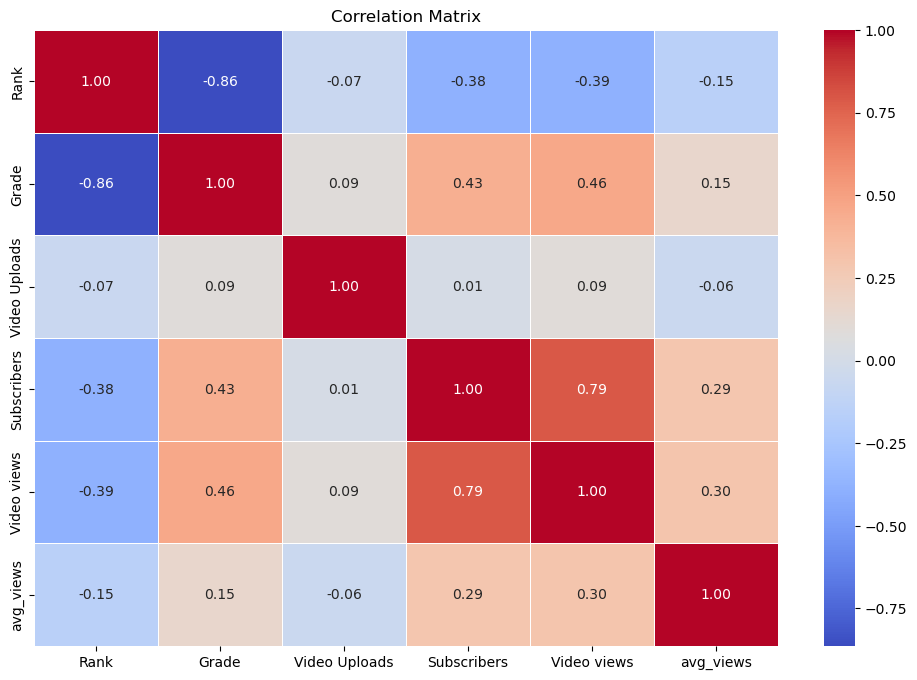

In [82]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Q4.  Which Grade Has A Maximum Number of Video Uploads?


<Axes: xlabel='Grade', ylabel='Video Uploads'>

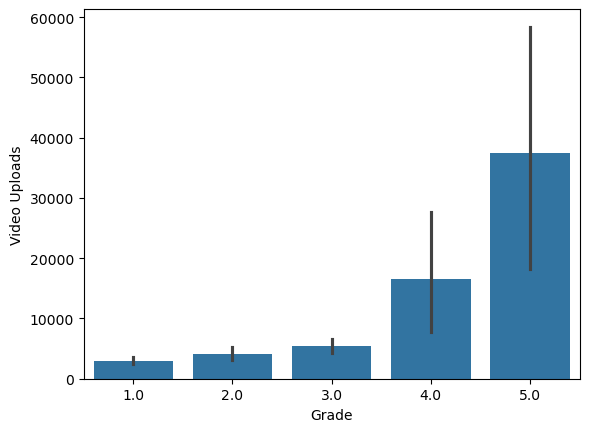

In [85]:
sns.barplot(x='Grade',y='Video Uploads',data=df)

From the above graph it is clear that when the grade is high, video upload is also high. Video Uploads are high in 'A++' video channels.

## Q5.Which Grade Has The Highest Average Views?


<Axes: xlabel='Grade', ylabel='avg_views'>

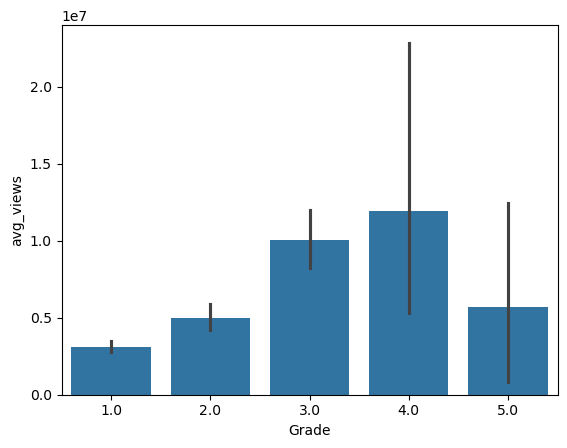

In [88]:
sns.barplot(x='Grade',y='avg_views',data=df)

Channels with 'A+' grade has higher number of average views compared to others.

## Q6.  Which Grade Has The Highest Number of Subscribers? 


<Axes: xlabel='Grade', ylabel='Subscribers'>

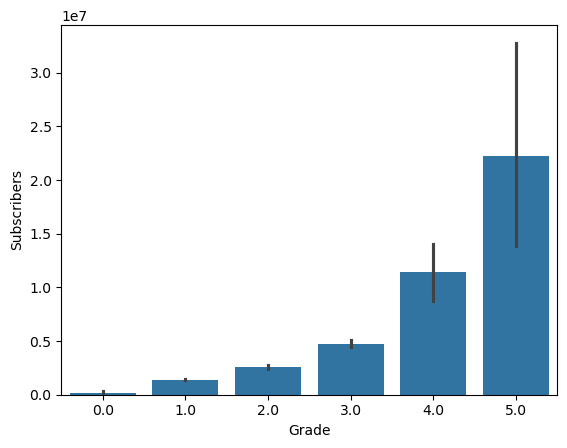

In [91]:
# Since the boolean value of NA is ambiguous while executing the barplot, I remove NA with 0.

df_filled = df.fillna(0)
sns.barplot(x='Grade', y='Subscribers', data=df_filled)

From the above graph it is clear that channel with the 'A++' Grade has the highest number of subscribers

## Q7. Which Grade Has The Highest Video Views? 


In [94]:
df.groupby('Grade')['Video views'].sum()

Grade
1.00    1556398001373
2.00    1066136831368
3.00    2273948590311
4.00     248177945463
5.00     211990911928
Name: Video views, dtype: int64